Information about the dataset:

The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306
Number of Attributes: 4 (including the class attribute)
Attribute Information:

1. Age    = Age of patient at time of operation (numerical)
2. Year   = Patient's year of operation (year - 1900, numerical)
3. Nodes  = Number of positive axillary nodes detected (numerical)
4. Status = Survival status (class attribute)
      1 = the patient survived 5 years or longer
      2 = the patient died within 5 year


In [83]:
# Importing the Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

File Location:

In [84]:
FILE_PATH = "/Users/rahul/Documents/Applied AI/EDA/Input/haberman.csv"

Importing the dataset " Haberman.csv "

In [85]:
# Using the pandas library the csv file is imported to analyse the data
haberman = pd.read_csv(FILE_PATH)

In [86]:
# This command shows the first five rows and information in the dataset
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [87]:
# Finding the shape of the dataset
print(haberman.shape)

(306, 4)


In [88]:
# Finding the name of the columns in the dataset
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [89]:
# Finding the data type for the respective columns in the dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [90]:
# Finding the dataset whether it is Balanced or Unbalanced.

haberman["status"].value_counts()



1    225
2     81
Name: status, dtype: int64

1. This dataset is Unbalanced dataset because the status of survival is not balanced to analyse the data
2. This dataset shows that the 225 patients from 306 where survived more that 5 years and 81 patients where survived less that 5 years.


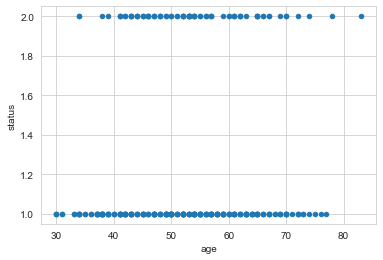

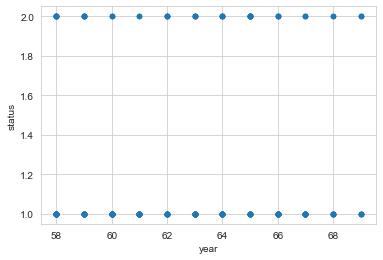

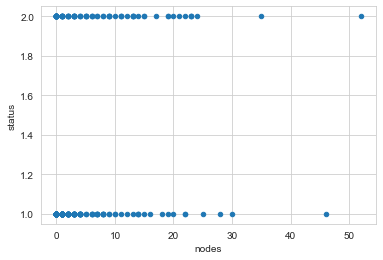

In [91]:
# Plotting the 2D Scatter plot

haberman.plot(kind='scatter', x='age', y='status')
haberman.plot(kind='scatter', x='year', y='status')
haberman.plot(kind='scatter', x='nodes', y='status')
plt.show()

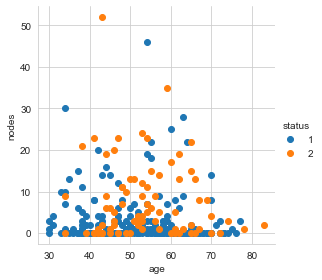

In [92]:
# 2D Scatter plot with color coding
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();



Observations:

1. Due to Unbalanced data it is difficult to predict or sepearte the data.
2. More number of data has been overlapped to predict or analyse


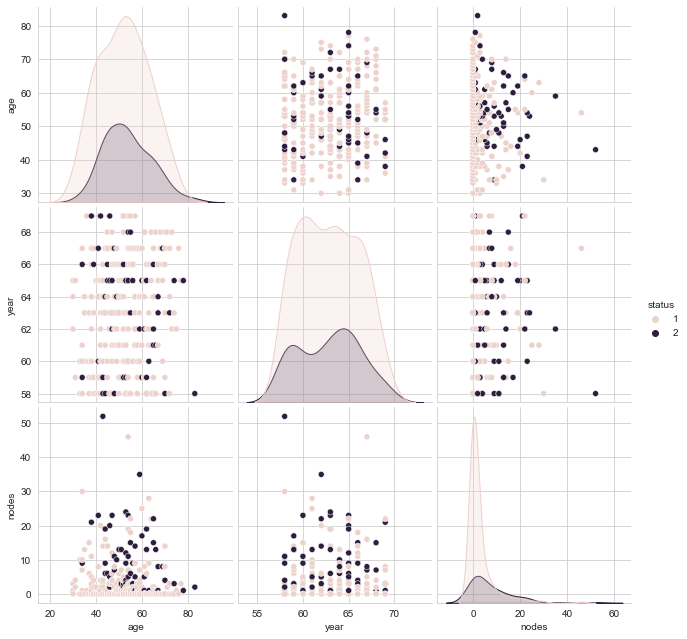

In [93]:
# pair plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3);
plt.show()

Observations:

1. Age and Nodes can be a useful feature to analyse the data.
2. By using the Nodes we can easily identified and seperate the data.

PLOT 2 and PLOT 4:

We could actually see that the Age and the Year data is overlapping each other so it is difficult to separate or to analyse the data. So we will be rejecting these plot for analysis

PLOT 3 and PLOT 7:

In these plots there are some nodes which we can separate the data for analysis or it can be easy to analyse the data for survival.

PLOT 6 AND PLOT 8:

These plots looks similar to the plot 2 and plot 4 due to more overlapping of data so we will be rejecting the data for analysis.

<AxesSubplot:xlabel='nodes', ylabel='Count'>

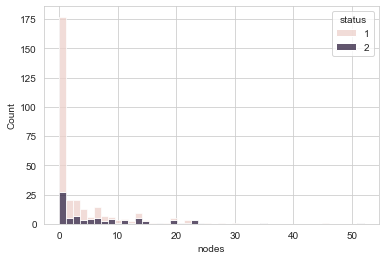

In [94]:
# Histogram 
sns.histplot(data=haberman, x="nodes", hue="status", multiple="stack")

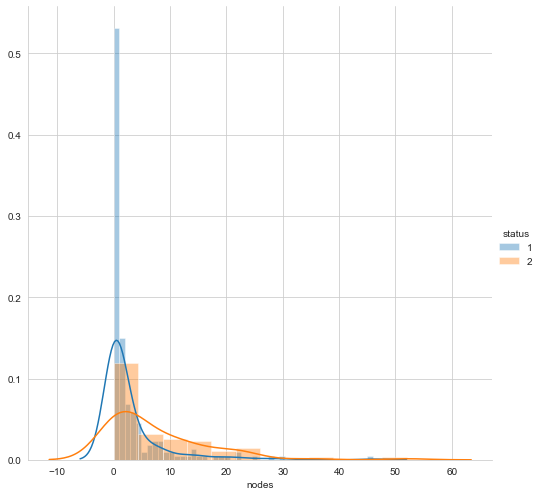

In [95]:
sns.FacetGrid(haberman, hue="status", size=7) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();



Observations:

It is noted that the people who have less nodes the survival rate is more.

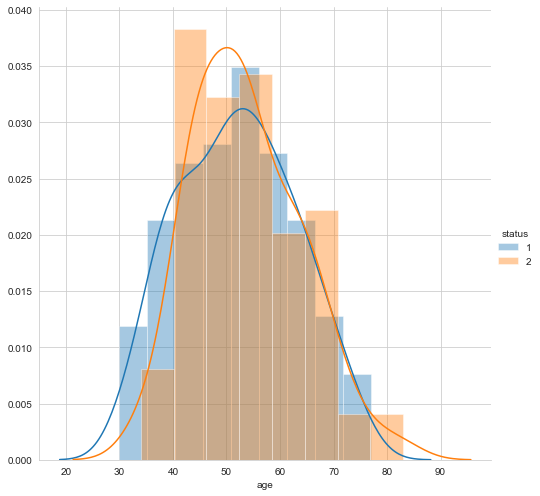

In [96]:
sns.FacetGrid(haberman, hue="status", size=7) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



Observations:

We could see that the patients whose age is in between 30 and 75 are having more number of chance for survival and also for death. These data cannot be analysed.

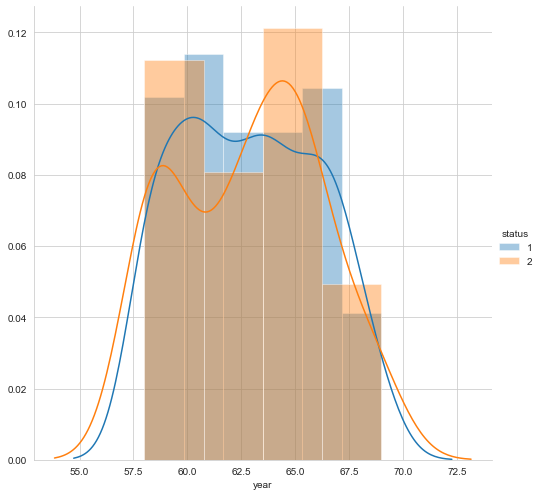

In [97]:
sns.FacetGrid(haberman, hue="status", size=7) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

Observations:

These looks similar to the histogram of Age where the survuval rate and death is equally same for analysing the data. These data cannot be analysed.

<AxesSubplot:xlabel='nodes', ylabel='Count'>

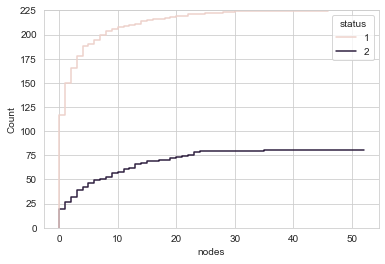

In [98]:
# CDF plot

sns.ecdfplot(data=haberman, x="nodes", hue="status", stat="count")

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


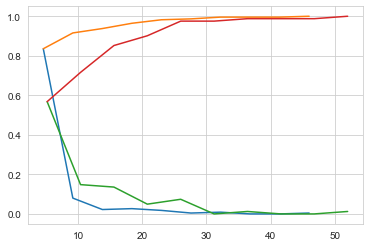

In [99]:
#Plot CDF of haberman long survival

haberman_long = haberman.loc[haberman["status"] == 1]
haberman_short = haberman.loc[haberman["status"] == 2]


counts, bin_edges = np.histogram(haberman_long['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



#Plot CDF of haberman short survival

counts, bin_edges = np.histogram(haberman_short['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)





plt.show();



Observations:

1. For long survival it shows that the node which is less than 5 will have 85% of chance of long survival. If the nodes is increasing the survival rate will be less.
2. For short survival it shows that the node which is less than 5 will have 56% of chance of survival. If the nodes increases the survival rate will be more less.

In [100]:
# Finding the Mean, Standard Deviation and other Statistical data.

haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


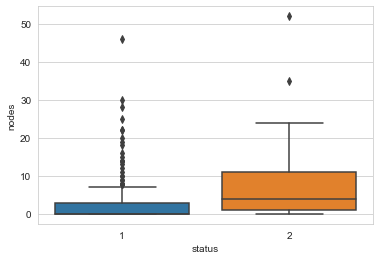

In [101]:
# Box Plot

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

Observations:

1. The threshold value for the long survival is 0 - 7.
2. The threshold value for the short survival is 0 - 25.
3. 25th and 50th percentile for the long survival is same.
4. 50 % of short survival also lies in this threshold so there is 50% of chance for the short survival to survive.

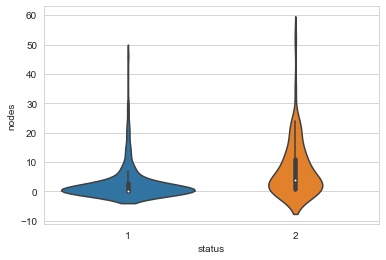

In [102]:
# Violin Plot

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

Observations:

1. From violin 1, it shows that the nodes from 0 to 7 the density is more and the survival rate is also more.
2. From violin 2, it shows that the nodes from 0 to 25 the density is more and there is more chance for short survival.


In [103]:
haberman_long.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [104]:
haberman_short.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0
